In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv('diabetes.csv')

In [3]:
df.shape

(2000, 9)

In [4]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [5]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [6]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   2000 non-null   int64  
 2   BloodPressure             2000 non-null   int64  
 3   SkinThickness             2000 non-null   int64  
 4   Insulin                   2000 non-null   int64  
 5   BMI                       2000 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Outcome                   2000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.8 KB


In [8]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,3.703500,121.182500,69.145500,20.935000,80.254000,32.193000,0.470930,33.090500,0.342000
std,3.306063,32.068636,19.188315,16.103243,111.180534,8.149901,0.323553,11.786423,0.474498
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,63.500000,0.000000,0.000000,27.375000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,40.000000,32.300000,0.376000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,130.000000,36.800000,0.624000,40.000000,1.000000
max,17.000000,199.000000,122.000000,110.000000,744.000000,80.600000,2.420000,81.000000,1.000000


In [9]:
df.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [10]:
df=df.rename(columns={'DiabetesPedigreeFunction':'DPF'})

In [11]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

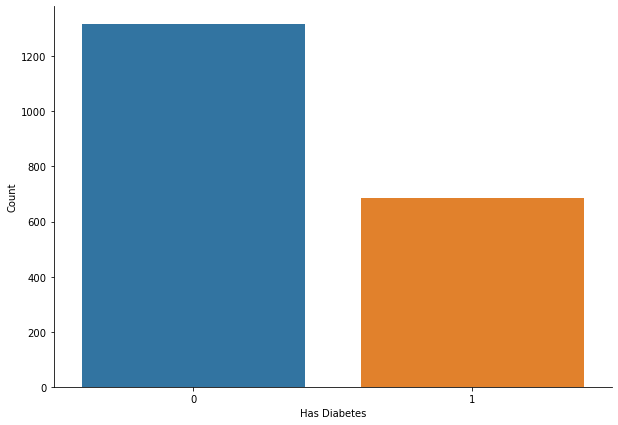

In [13]:
plt.figure(figsize=(10,7))
sns.countplot(x="Outcome",data=df)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.xlabel('Has Diabetes')
plt.ylabel('Count')
plt.show()

In [14]:
df_copy=df.copy(deep=True)
df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']]=df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)
df_copy.isnull().sum()

Pregnancies        0
Glucose           13
BloodPressure     90
SkinThickness    573
Insulin          956
BMI               28
DPF                0
Age                0
Outcome            0
dtype: int64

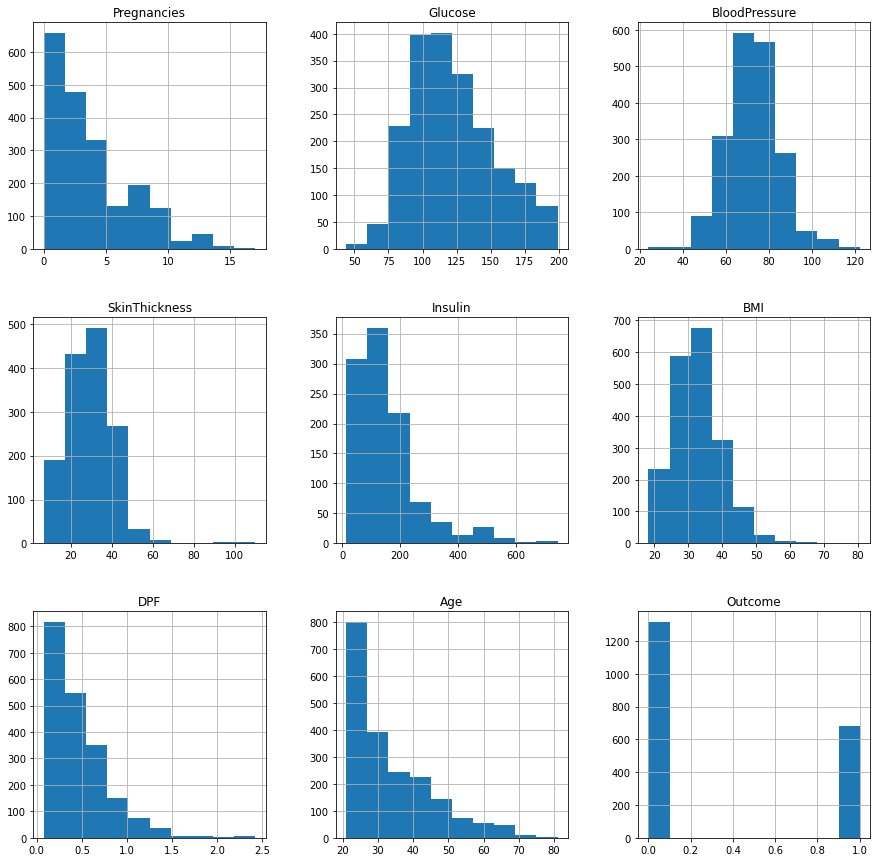

In [15]:
p=df_copy.hist(figsize=(15,15))

In [16]:
df_copy['Glucose'].fillna(df_copy['Glucose'].mean(),inplace=True)
df_copy['BloodPressure'].fillna(df_copy["BloodPressure"].mean(),inplace=True)
df_copy["SkinThickness"].fillna(df_copy["SkinThickness"].median(),inplace=True)
df_copy['Insulin'].fillna(df_copy["Insulin"].median(),inplace=True)
df_copy["BMI"].fillna(df_copy["BMI"].median(),inplace=True)

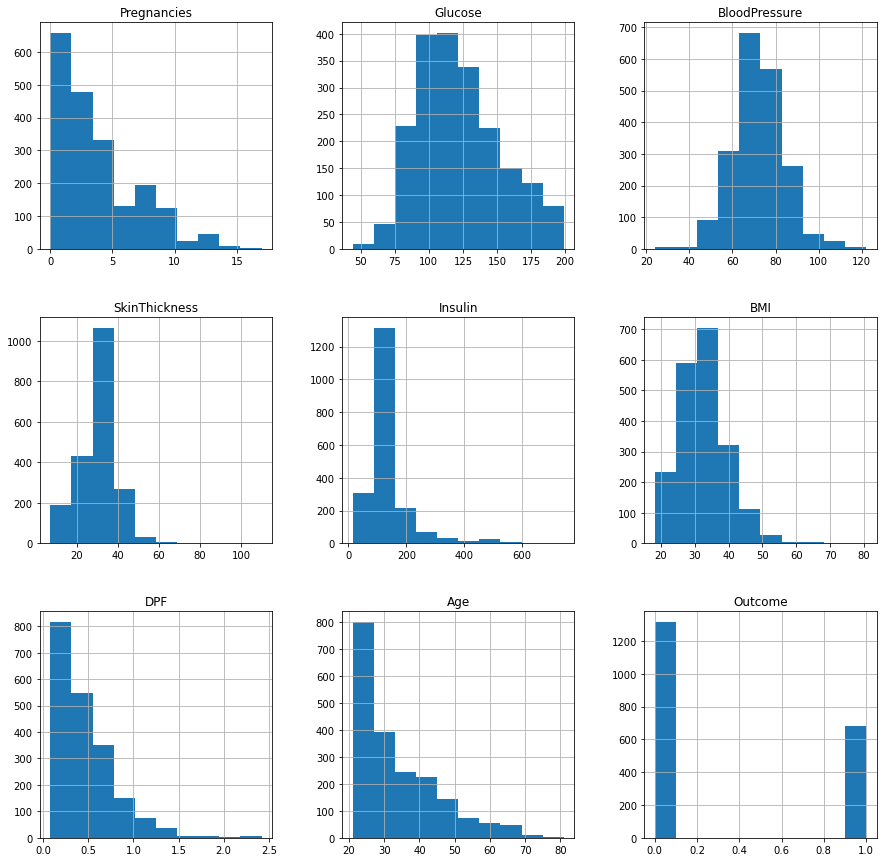

In [17]:
p=df_copy.hist(figsize=(15,15))

In [18]:
df_copy.isnull().sum()

Pregnancies      0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
DPF              0
Age              0
Outcome          0
dtype: int64

In [19]:
df_copy['DPF'].dtypes

dtype('float64')

### Model Building

In [20]:
from sklearn.model_selection import train_test_split

X = df.drop(columns='Outcome')
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
print('X_train size: {}, X_test size: {}'.format(X_train.shape, X_test.shape))

X_train size: (1600, 8), X_test size: (400, 8)


In [21]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [22]:
#Using GridSearchCV to find the best the algorithm
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [25]:
#creating a function to calculate to the best model for this problem
def find_best_model(X,y):
    models={
        'logistic_regression':{
            'model':LogisticRegression(solver='lbfgs',multi_class='auto'),
            'parameters':{
                'C':[1,5,10]
            }
        },
        'decision_tree':{
            'model':DecisionTreeClassifier(splitter='best'),
            'parameters':{
                'criterion':['gini','entropy'],
                'max_depth':[5,10]
            }
        },
        'random_forest':{
            'model':RandomForestClassifier(criterion='gini'),
            'parameters':{
                'n_estimators':[10,15,20,50,100,200]

            }
        },
        'svm':{
            'model':SVC(gamma='auto'),
            'parameters':{
                "C":[1,10,20],
                'kernel':['rbf','linear']
            }
        }
        
    }
    
    
    scores=[]
    cv_shuffle=ShuffleSplit(n_splits=5,test_size=0.20,random_state=0)
    for model_name,model_params in models.items():
        gs=GridSearchCV(model_params["model"],model_params['parameters'],cv=cv_shuffle,return_train_score=False)
        gs.fit(X,y)
        scores.append({
                      'model':model_name,
                      'best_parameters':gs.best_params_,
                      'score':gs.best_score_
        })
        
        
    return pd.DataFrame(scores,columns=['model','best_parameters','score'])


find_best_model(X_train,y_train)
   

,model,best_parameters,score
0,logistic_regression,{'C': 10},0.763125
1,decision_tree,"{'criterion': 'gini', 'max_depth': 10}",0.897500
2,random_forest,{'n_estimators': 200},0.948750
3,svm,"{'C': 20, 'kernel': 'rbf'}",0.869375


In [28]:
#using cross val score for gaining average accuracy
from sklearn.model_selection import cross_val_score
scores=cross_val_score(RandomForestClassifier(n_estimators=20,random_state=0),X_train,y_train,cv=5)
print(f"Average accuracy :{round(sum(scores)*100/len(scores),3)} % ")

Average accuracy :95.0 % 


In [29]:
#creating Random Forest Model
classifier=RandomForestClassifier(n_estimators=20,random_state=0)
classifier.fit(X_train,y_train)

RandomForestClassifier(n_estimators=20, random_state=0)

## Model Evaluation

In [30]:
#creating a confusion matrix
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
y_pred=classifier.predict(X_test)
cm=confusion_matrix(y_test,y_pred)
cm

array([[272,   0],
       [  5, 123]], dtype=int64)

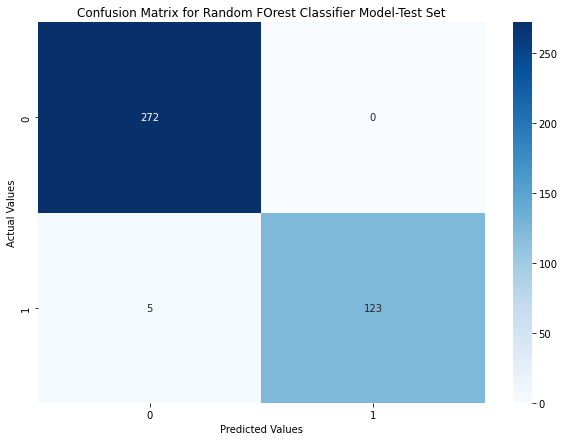

In [31]:
#plotting a confusion matrix
plt.figure(figsize=(10,7))
p=sns.heatmap(cm,annot=True,cmap="Blues",fmt='g')
plt.title("Confusion Matrix for Random FOrest Classifier Model-Test Set")
plt.xlabel('Predicted Values')
plt.ylabel("Actual Values")
plt.show()

In [33]:
#accuracy Score
score=round(accuracy_score(y_test,y_pred),4)*100
print(f'Acuuracy score on test set :{score}%')

Acuuracy score on test set :98.75%


In [34]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       272
           1       1.00      0.96      0.98       128

    accuracy                           0.99       400
   macro avg       0.99      0.98      0.99       400
weighted avg       0.99      0.99      0.99       400



In [35]:
#creating a confusion matrix for training set
y_train_pred=classifier.predict(X_train)
cm=confusion_matrix(y_train,y_train_pred)
cm

array([[1044,    0],
       [   1,  555]], dtype=int64)

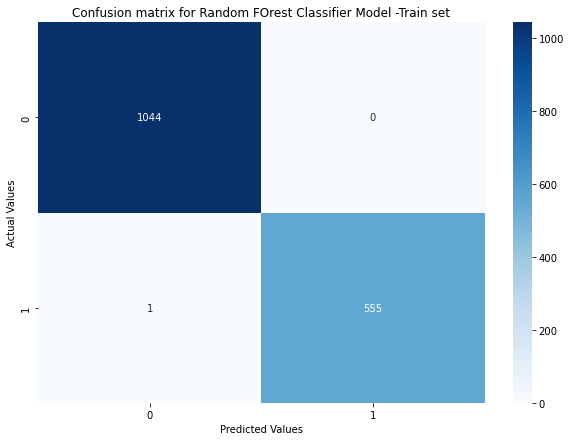

In [36]:
#plotting a confusion matrix
plt.figure(figsize=(10,7))
p=sns.heatmap(cm,annot=True,cmap="Blues",fmt='g')
plt.title('Confusion matrix for Random FOrest Classifier Model -Train set')
plt.xlabel('Predicted Values')
plt.ylabel("Actual Values")
plt.show()

In [38]:
#Accuracy Score
score=round(accuracy_score(y_train,y_train_pred),4)*100
print(f'Accuracy on training set:{score}')

Accuracy on training set:99.94


In [39]:
#classification report
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1044
           1       1.00      1.00      1.00       556

    accuracy                           1.00      1600
   macro avg       1.00      1.00      1.00      1600
weighted avg       1.00      1.00      1.00      1600



## Predictions

In [45]:
#Creating a function for prediction
def predict_diabetes(Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DPF, Age):
    preg=int(Pregnancies)
    glucose=float(Glucose)
    bp=float(BloodPressure)
    st=float(SkinThickness)
    insulin=float(Insulin)
    bmi=float(BMI)
    dpf=float(DPF)
    age=int(Age)
    
    x=[[preg,glucose,bp,st,insulin,bmi,dpf,age]]
    x=sc.transform(x)
    
    return classifier.predict(x)

In [47]:
#Prediction 1
# Input sequence: Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DPF, Age
prediction = predict_diabetes(2, 81, 72, 15, 76, 30.1, 0.547, 25)[0]
if prediction:
  print('Oops! You have diabetes.')
else:
  print("Great! You don't have diabetes.")

Great! You don't have diabetes.


C:\Users\saket\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [48]:
# Prediction 2
# Input sequence: Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DPF, Age
prediction = predict_diabetes(1, 117, 88, 24, 145, 34.5, 0.403, 40)[0]
if prediction:
  print('Oops! You have diabetes.')
else:
  print("Great! You don't have diabetes.")

Oops! You have diabetes.


C:\Users\saket\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
